In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

50 27.12725874663591
100 57.088128614841686
150 89.85851497741328
200 117.03512289299769
250 152.424437707338
300 184.06463504817827
350 214.44926583388124
400 244.25635412715096
450 274.8861411694141
500 302.6838060406134
550 335.5467010978225
600 363.73818455652116
650 396.33643620472816
700 430.9515243151723
750 461.8193832989658
800 496.74406991260923
850 525.9826291319674
900 560.2887776684187
950 592.6462620010371
1000 629.1690108093703


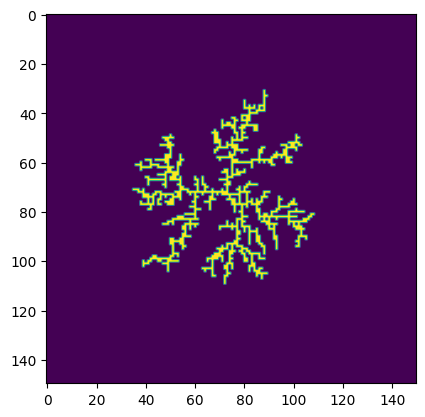

In [14]:
n = 150
grid = np.zeros((n,n))
grid[n//2, n//2] = 1

directions = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])

def get_neighbors(grid):
    return np.roll(grid, 1, axis=0) + np.roll(grid, -1, axis=0) + np.roll(grid, 1, axis=1) + np.roll(grid, -1, axis=1)

def new_position(grid):
    x, y = n//2, n//2
    while grid[x, y] == 1:
        theta = np.random.rand() * 2 * np.pi
        x = int(n//2 * np.cos(theta) + n//2)
        y = int(n//2 * np.sin(theta) + n//2)
    return np.array([x, y])

def step(grid, current, neighbors):
    direction = directions[np.random.randint(0, 4)]
    new = current + direction
    new = np.mod(new, n)
    if neighbors[*new] > 0:
        grid[*new] = 1
        neighbors = get_neighbors(grid)
        return grid, new_position(grid), neighbors, True
    return grid, new, neighbors, False

def radius_of_gyration(grid):
    x, y = np.where(grid == 1)
    x = x - np.mean(x)
    y = y - np.mean(y)
    return np.mean(x**2 + y**2)

current = new_position(grid)
neighbors = get_neighbors(grid)

grid_list = [grid]
gyrations = []
N = []
i = 0
while i < 1000:
    grid, current, neighbors, stopped = step(grid, current, neighbors)
    i += stopped
    if stopped: 
        grid_list.append(grid.copy())
        if i % 50 == 0:
            gyrations.append(radius_of_gyration(grid))
            N.append(i)
            print(i, gyrations[-1])

plt.imshow(grid);

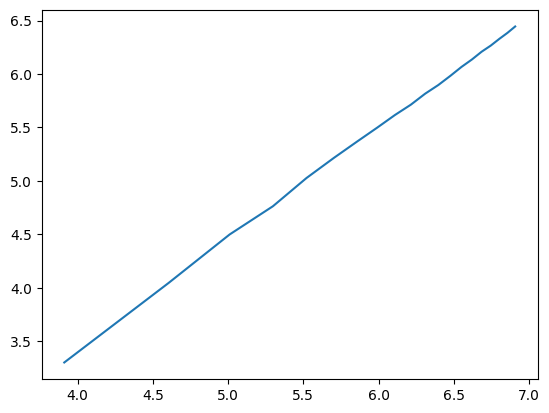

Slope: 1.0381544457247152


In [15]:
plt.plot(np.log(N), np.log(gyrations))
plt.show()

print('Slope:', np.polyfit(np.log(N), np.log(gyrations), 1)[0])

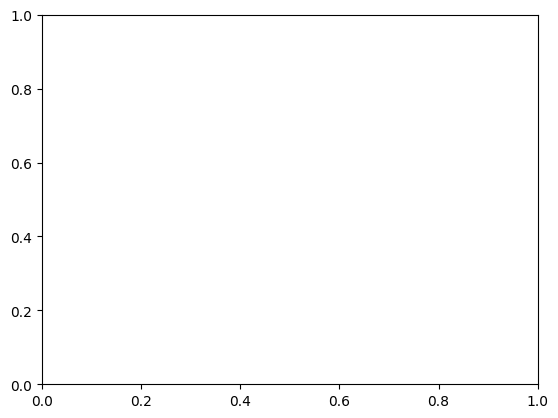

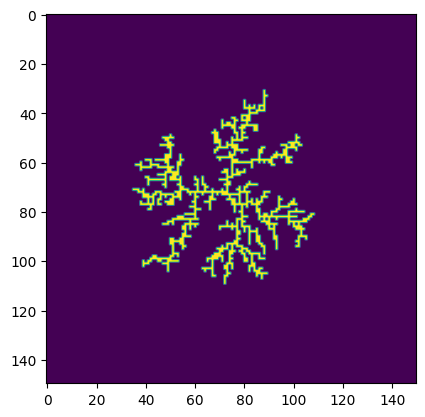

In [16]:
fig, ax = plt.subplots()

def update(i):
    ax.clear()
    ax.imshow(grid_list[5*i])

fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, update, frames=200, interval=5)

writer = animation.PillowWriter()
ani.save(f'../images/animation.gif', writer=writer)